In [1]:
import sys
import pandas as pd

sys.path.append('..')

import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split

# DEID libraries
from gojo import core
from gojo import deepl
from gojo import util
from gojo import plotting

In [2]:
# load test dataset (Wine)
wine_dt = datasets.load_wine()

# create the target variable. Classification problem 0 vs rest
# to see the target names you can use wine_dt['target_names']
y = (wine_dt['target'] == 1).astype(int)  
X = wine_dt['data']

# standarize input data
X = util.zscoresScaling(X)

In [4]:
model = core.ParametrizedTorchSKInterface(
    # example of generating function
    generating_fn=deepl.ffn.createSimpleFFNModel,
    gf_params=dict(
        in_feats=13,
        out_feats=1,
        layer_dims=[20, 10],
        layer_activation='ELU',
        output_activation='Sigmoid'),
    # example of iteration function
    iter_fn=deepl.iterSupervisedEpoch,
    loss_function=torch.nn.BCELoss(),
    n_epochs=50,
    train_split=0.8,
    train_split_stratify=True,
    optimizer_class=torch.optim.Adam,
    dataset_class=deepl.loading.TorchDataset,
    dataloader_class=torch.utils.data.DataLoader,
    optimizer_kw=dict(
        lr=0.001
    ),
    train_dataloader_kw=dict(
        batch_size=16,
        shuffle=True
    ),
    valid_dataloader_kw=dict(
        batch_size=200
    ),
    # use default classification metrics
    metrics=core.getDefaultMetrics(
       'binary_classification', bin_threshold=0.5, select=['f1_score']),
)
model

ParametrizedTorchSKInterface(
    model=Sequential(
  (LinearLayer 0): Linear(in_features=13, out_features=20, bias=True)
  (Activation 0): ELU(alpha=1.0)
  (LinearLayer 1): Linear(in_features=20, out_features=10, bias=True)
  (Activation 1): ELU(alpha=1.0)
  (LinearLayer 2): Linear(in_features=10, out_features=1, bias=True)
  (Activation 2): Sigmoid()
),
    iter_fn=<function iterSupervisedEpoch at 0x7fd7ca47b940>,
    loss_function=BCELoss(),
    n_epochs=50,
    train_split=0.8,
    train_split_stratify=True,
    optimizer_class=<class 'torch.optim.adam.Adam'>,
    dataset_class=<class 'gojo.deepl.loading.TorchDataset'>,
    dataloader_class=<class 'torch.utils.data.dataloader.DataLoader'>,
    optimizer_kw={'lr': 0.001},
    train_dataset_kw={},
    valid_dataset_kw={},
    train_dataloader_kw={'batch_size': 16, 'shuffle': True},
    valid_dataloader_kw={'batch_size': 200},
    iter_fn_kw={},
    callbacks=None,
    metrics=[Metric(
    name=f1_score,
    function_kw={},
    multic

In [6]:
model.update(
    gf_params__layer_dims=[5],
    n_epochs=100
)
model

ParametrizedTorchSKInterface(
    model=Sequential(
  (LinearLayer 0): Linear(in_features=13, out_features=5, bias=True)
  (Activation 0): ELU(alpha=1.0)
  (LinearLayer 1): Linear(in_features=5, out_features=1, bias=True)
  (Activation 1): Sigmoid()
),
    iter_fn=<function iterSupervisedEpoch at 0x7fd7ca47b940>,
    loss_function=BCELoss(),
    n_epochs=100,
    train_split=0.8,
    train_split_stratify=True,
    optimizer_class=<class 'torch.optim.adam.Adam'>,
    dataset_class=<class 'gojo.deepl.loading.TorchDataset'>,
    dataloader_class=<class 'torch.utils.data.dataloader.DataLoader'>,
    optimizer_kw={'lr': 0.001},
    train_dataset_kw={},
    valid_dataset_kw={},
    train_dataloader_kw={'batch_size': 16, 'shuffle': True},
    valid_dataloader_kw={'batch_size': 200},
    iter_fn_kw={},
    callbacks=None,
    metrics=[Metric(
    name=f1_score,
    function_kw={},
    multiclass=False
)],
    seed=None,
    device=cpu,
    verbose=1,
    generating_fn=<function createSimpleFFN

In [3]:
# create the model to be evaluated
model = core.ParametrizedTorchSKInterface(
    generating_fn=deepl.ffn.createSimpleFFNModel,
    gf_params=dict(
        in_feats=13,
        out_feats=1,
        layer_dims=[20, 10],
        layer_activation='ELU',
        output_activation='Sigmoid'),
    iter_fn=deepl.iterSupervisedEpoch,
    loss_function=torch.nn.BCELoss(),
    n_epochs=50,
    train_split=0.8,
    train_split_stratify=True,
    optimizer_class=torch.optim.Adam,
    dataset_class=deepl.loading.TorchDataset,
    dataloader_class=torch.utils.data.DataLoader,
    optimizer_kw=dict(
        lr=0.001
    ),
    train_dataset_kw=None,
    valid_dataset_kw=None,
    train_dataloader_kw=dict(
        batch_size=16,
        shuffle=True
    ),
    valid_dataloader_kw=dict(
        batch_size=200
    ),
    iter_fn_kw= None,
    callbacks= None,
    seed=1997,
    device='mps',
    metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5, select=['f1_score']),
    verbose=0
    
)
model

ParametrizedTorchSKInterface(
    model=Sequential(
  (LinearLayer 0): Linear(in_features=13, out_features=20, bias=True)
  (Activation 0): ELU(alpha=1.0)
  (LinearLayer 1): Linear(in_features=20, out_features=10, bias=True)
  (Activation 1): ELU(alpha=1.0)
  (LinearLayer 2): Linear(in_features=10, out_features=1, bias=True)
  (Activation 2): Sigmoid()
),
    iter_fn=<function iterSupervisedEpoch at 0x7fd7ca47b940>,
    loss_function=BCELoss(),
    n_epochs=50,
    train_split=0.8,
    train_split_stratify=True,
    optimizer_class=<class 'torch.optim.adam.Adam'>,
    dataset_class=<class 'gojo.deepl.loading.TorchDataset'>,
    dataloader_class=<class 'torch.utils.data.dataloader.DataLoader'>,
    optimizer_kw={'lr': 0.001},
    train_dataset_kw={},
    valid_dataset_kw={},
    train_dataloader_kw={'batch_size': 16, 'shuffle': True},
    valid_dataloader_kw={'batch_size': 200},
    iter_fn_kw={},
    callbacks=None,
    metrics=[Metric(
    name=f1_score,
    function_kw={},
    multic

In [4]:
# evaluate the model using a simple cross-validation strategy with a 
# default parameters
cv_report = core.evalCrossVal(
    X=X,
    y=y,
    model=model,
    cv=util.getCrossValObj(cv=5, stratified=True, loocv=False, random_state=1997),
    verbose=True,
    save_train_preds=True,
    save_models=True,
    n_jobs=1
)
scores = cv_report.getScores(core.getDefaultMetrics('binary_classification', bin_threshold=0.5))
scores['test']

Making predictions...: 5it [00:25,  5.00s/it]


,accuracy,balanced_accuracy,precision,recall,sensitivity,specificity,negative_predictive_value,f1_score,auc,n_fold
0,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
2,0.972222,0.976190,0.9375,1.000000,1.000000,0.952381,1.000000,0.967742,0.976190,2
3,0.971429,0.964286,1.0000,0.928571,0.928571,1.000000,0.954545,0.962963,0.964286,3
4,0.971429,0.964286,1.0000,0.928571,0.928571,1.000000,0.954545,0.962963,0.964286,4


In [5]:
def displayConvergence(models):
    train_histories = []
    valid_histories = []
    for model in models:
        model_history = model.fitting_history
        train_histories.append(model_history['train'])
        valid_histories.append(model_history['valid'])
        
    # display model convergence
    plotting.linePlot(
        *(train_histories + valid_histories),
        x='epoch', y='loss (mean)', err='loss (std)',
        legend_labels=[
            'Train (%d)' % i for i in range(len(train_histories))] + [
            'Valid (%d)' % i for i in range(len(valid_histories))],
        colors=['Red'] * len(train_histories) + ['Blue'] * len(valid_histories),
        title='Model convergence',
        legend_pos='center right')

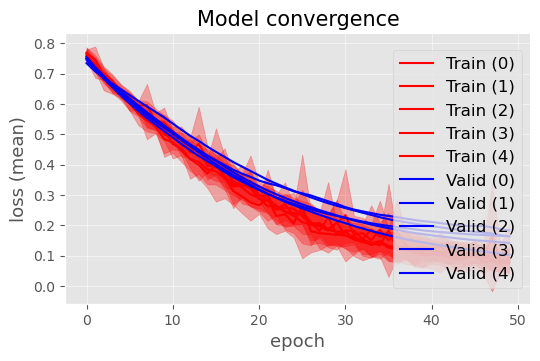

In [6]:
displayConvergence(list(cv_report.getTrainedModels().values()))

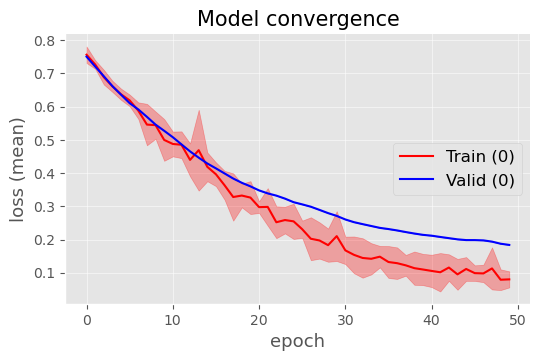

In [7]:
displayConvergence(
    [cv_report.getTrainedModels()[0]]
)

In [8]:
assert False

AssertionError: 

In [15]:
l = [('p1', 'None_1'), ('p2', 10)]

for i, (name, _) in enumerate(l):
    if name == 'p1':
        l[i] = (l[i][0], 'NEW_VAL')
    if name == 'p2':
        l[i] = (l[i][0], l[i][1] + 10)
    
l

[('p1', 'NEW_VAL'), ('p2', 20)]

In [16]:
tuple(l)

(('p1', 'NEW_VAL'), ('p2', 20))

In [ ]:
cv_report.getTrainedModels()[0]

In [ ]:
# load test dataset (Wine)
wine_dt = datasets.load_wine()

# create the target variable. Classification problem 0 vs rest
# to see the target names you can use wine_dt['target_names']
y = (wine_dt['target'] == 1).astype(int)  
X = wine_dt['data']

# standarize input data
std_X = util.zscoresScaling(X)

# split Xs and Ys in training and validation
X_train, X_valid, y_train, y_valid = train_test_split(
    std_X, y, train_size=0.8, random_state=1997, shuffle=True,
    stratify=y
)
X_train.shape, X_valid.shape, '%.3f' % y_train.mean(),  '%.3f' % y_valid.mean()

In [ ]:
model.train(X_train, y_train)

In [ ]:
model_history = model.fitting_history

# display model convergence
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='loss (mean)', err='loss (std)',
    legend_labels=['Train', 'Validation'],
    title='Model convergence',
    ls=['solid', 'dashed'],
    legend_pos='center right')

# display model performance
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='f1_score', 
    legend_labels=['Train', 'Validation'],
    title='Model F1-score',
    ls=['solid', 'dashed'],
    legend_pos='center right')

In [ ]:
model.update(
    n_epochs=100,
    train_dataloader_kw__batch_size=32,
    gf_params__layer_dims=[5, 5, 5],
    metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5, select=['f1_score', 'auc'])
)

model

In [ ]:
y_hat = model.performInference(X_valid)

In [ ]:
((y_hat > 0.5) == (y_valid > 0.5)).mean()

In [ ]:
pd.DataFrame([core.getScores(y_true=y_valid, y_pred=y_hat, 
               metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5))]).T.round(decimals=3)

In [ ]:
model.train(X_train, y_train)

In [ ]:
model_history = model.fitting_history

# display model convergence
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='loss (mean)', err='loss (std)',
    legend_labels=['Train', 'Validation'],
    title='Model convergence',
    ls=['solid', 'dashed'],
    legend_pos='center right')

# display model performance
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='f1_score', 
    legend_labels=['Train', 'Validation'],
    title='Model F1-score',
    ls=['solid', 'dashed'],
    legend_pos='center right')

In [ ]:
y_hat = model.performInference(X_valid)
pd.DataFrame([core.getScores(y_true=y_valid, y_pred=y_hat, 
               metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5))]).T.round(decimals=3)

In [ ]:
# reset the model and perform the predictions
model.resetFit()
y_hat = model.performInference(X_valid)
pd.DataFrame([core.getScores(y_true=y_valid, y_pred=y_hat, 
               metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5))]).T.round(decimals=3)

In [ ]:
model_history = model.fitting_history

# display model convergence
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='loss (mean)', err='loss (std)',
    legend_labels=['Train', 'Validation'],
    title='Model convergence',
    ls=['solid', 'dashed'],
    legend_pos='center right')

# display model performance
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='f1_score', 
    legend_labels=['Train', 'Validation'],
    title='Model F1-score',
    ls=['solid', 'dashed'],
    legend_pos='center right')

In [ ]:
# reset the model and perform the predictions
model.train(X_train, y_train)
y_hat = model.performInference(X_valid)
core.getScores(y_true=y_valid, y_pred=y_hat, 
               metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5))